# Problem Statement
### Create a CNN-based model that accurately detects melanoma. If melanoma is not found in its early stages, it can be fatal. It is responsible for 75% of skin cancer fatalities. A system that can analyse photos and notify dermatologists of the existence of melanoma might potentially eliminate the need for a lot of manual diagnosis work.

### The dataset, which was created by the International Skin Imaging Collaboration, has 2357 photos of cancers, both malignant and benign (ISIC). With the exception of melanomas and moles, whose photos have a minor predominance, all images were sorted according to the categorization determined with ISIC, and all subgroups were divided into the same number of images.

# Process Flow Diagram

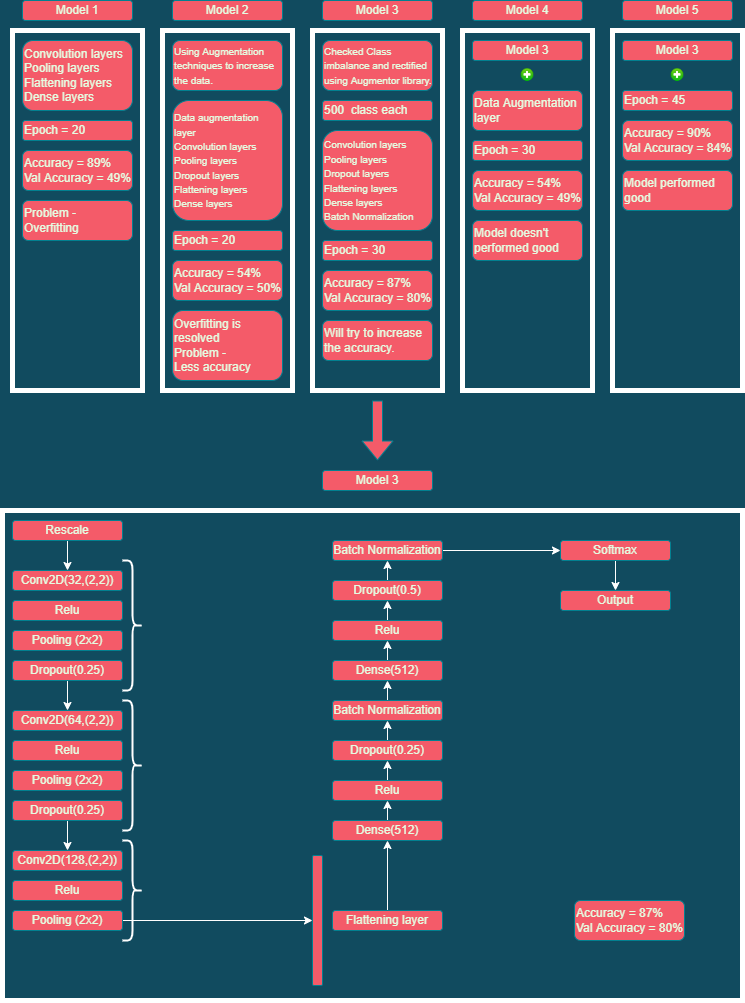

# Importing libraries

In [ ]:
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

import warnings
warnings.filterwarnings('ignore')

# Establishing the train and test picture paths

In [28]:
data_dir_train = pathlib.Path("/Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

# Identifing how many images are in the Train and Test directory.

In [29]:
#Train Images count
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Images count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Defining Batch size and image size for the model

In [30]:
batch_size = 32
img_height = 180
img_width = 180

# Splitting the data into 8:2 ratio 80% training data and 20% testing

In [31]:
#Train datset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="training",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [32]:
#Validation Dataset
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width),label_mode='categorical',
                                                              seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


# Finding all of the available classes

In [33]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualizing every class picture

Found 2239 files belonging to 9 classes.


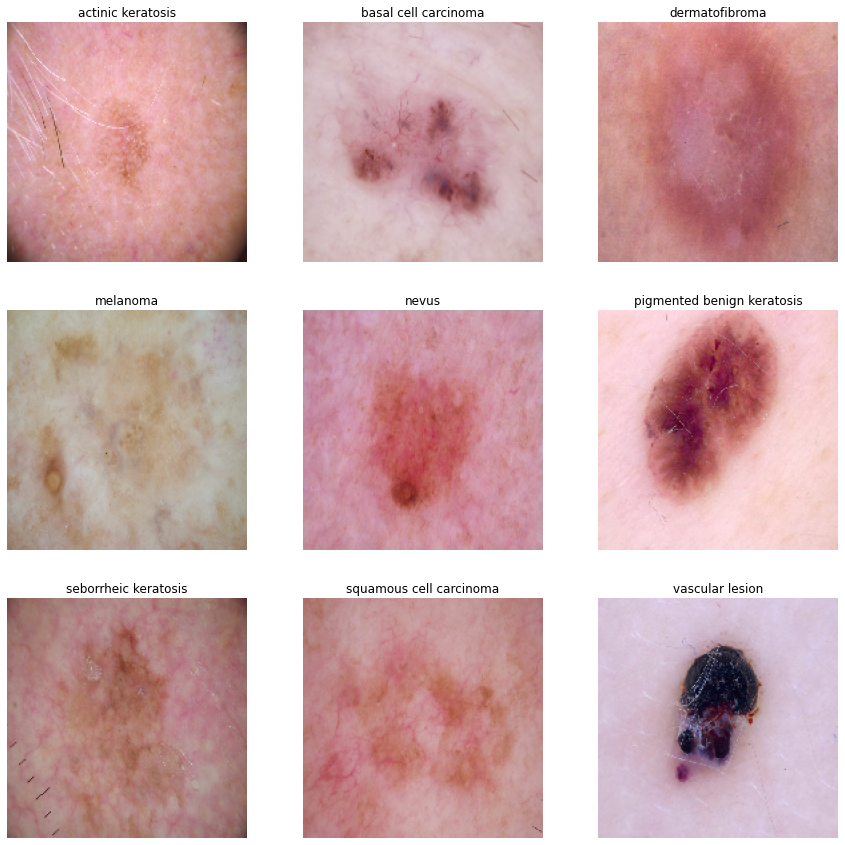

In [34]:
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#All the class names
class_names = image_dataset.class_names

#Dictionary to store the image path according to the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))
    

plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

# Model 1

In [35]:
input_shape = (img_height,img_width,3)

#We can generate models with Sequential layer by layer.
model = Sequential()     

#First Convulation Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=input_shape))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#The function Keras.layers.flatten reduces the multiple-dimensional input tensors to a single dimension.
model.add(layers.Flatten())   

#Dense Layer
model.add(layers.Dense(512,activation='relu'))

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

# Compiling the model

In [36]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Summary of all layers

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 128)      

# Training the model

In [38]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 55s 955ms/step - loss: 2.0154 - accuracy: 0.2695 - val_loss: 1.7290 - val_accuracy: 0.4004
Epoch 2/20
56/56 [==============================] - 60s 1s/step - loss: 1.6329 - accuracy: 0.4079 - val_loss: 1.7477 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 64s 1s/step - loss: 1.5531 - accuracy: 0.4492 - val_loss: 1.5658 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 76s 1s/step - loss: 1.4298 - accuracy: 0.4933 - val_loss: 1.4246 - val_accuracy: 0.4899
Epoch 5/20
56/56 [==============================] - 78s 1s/step - loss: 1.3096 - accuracy: 0.5480 - val_loss: 1.4047 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 84s 1s/step - loss: 1.2351 - accuracy: 0.5558 - val_loss: 1.4860 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 82s 1s/step - loss: 1.1850 - accuracy: 0.5792 - val_loss: 1.4990 - val_accuracy: 0.5280
Epoch 8/20
56/56 

# Visualizing the result

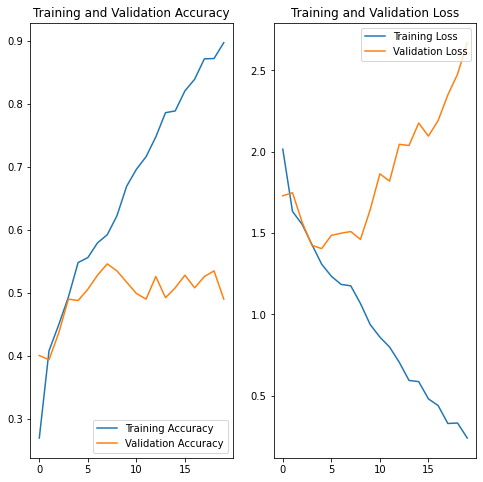

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Insights
### The model is overfitting. We can see from the training vs. validation accuracy graph above that the discrepancy between training accuracy and validation accuracy grows as the epoch size increases.

# ---------------------------------------------------------------------------------------

# Trying augmentation technique (to increase the class images)

In [10]:
#Data augumentation strategy. 

rescale = tf.keras.Sequential([
  #To rescale an input in the [0, 255] range to be in the [0, 1] range  
  layers.experimental.preprocessing.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  #Randomly fliping each image horizontally and vertically.
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    
  #Randomly rotating each image.
  layers.experimental.preprocessing.RandomRotation(0.2),
    
  #Randomly zooming each image during training.
  layers.experimental.preprocessing.RandomZoom(0.2),
    
  #Randomly translating each image during training.
  layers.experimental.preprocessing.RandomTranslation(0.1, 0.1)    
])

# Visualize the augmentation image

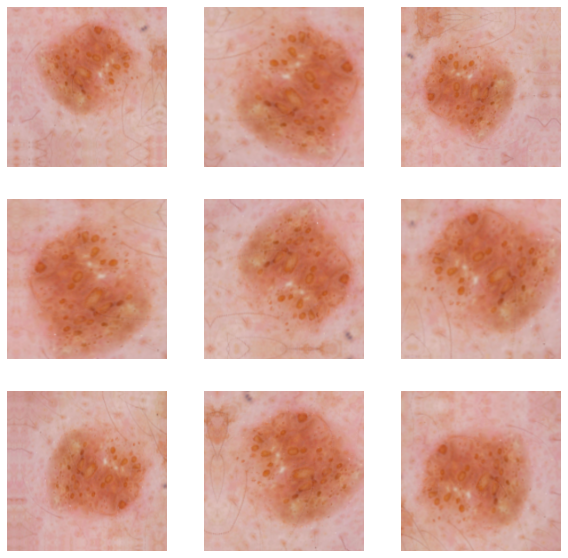

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):   
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")  

# Model 2

In [14]:
#Dropout layer: randomly sets input units to 0 with a frequency of rate at each step during training time,
#which helps prevent overfitting.Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

#We can generate models with Sequential layer by layer.
model2 = Sequential()                      

model2.add(data_augmentation)             #Augmentation layer from the above code
model2.add(rescale)                       #Rescaling layer from the above code

#First Convulation Layer
model2.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Second Convulation Layer
model2.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 25% Fraction of the input units to drop.
model2.add(layers.Dropout(0.25))

#Third Convulation Layer
model2.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))

#The function Keras.layers.flatten reduces the multiple-dimensional input tensors to a single dimension.
model2.add(layers.Flatten())

#Dense Layer
model2.add(layers.Dense(512,activation='relu'))

#Dense Layer
model2.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model2.add(layers.Dropout(0.50))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model2.add(layers.Dense(len(class_names),activation='softmax'))

# Compiling the model

In [15]:
model2.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Training the model

In [16]:
epochs =20
history = model2.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/20


56/56 [==============================] - 90s 1s/step - loss: 2.2918 - accuracy: 0.2137 - val_loss: 2.0587 - val_accuracy: 0.3356
Epoch 2/20
56/56 [==============================] - 68s 1s/step - loss: 1.9131 - accuracy: 0.3036 - val_loss: 1.8739 - val_accuracy: 0.3624
Epoch 3/20
56/56 [==============================] - 67s 1s/step - loss: 1.7522 - accuracy: 0.3767 - val_loss: 1.7787 - val_accuracy: 0.3691
Epoch 4/20
56/56 [==============================] - 67s 1s/step - loss: 1.6828 - accuracy: 0.4074 - val_loss: 1.6253 - val_accuracy: 0.4474
Epoch 5/20
56/56 [==============================] - 68s 1s/step - loss: 1.6429 - accuracy: 0.4124 - val_loss: 1.5998 - val_accuracy: 0.4295
Epoch 6/20
56/56 [==============================] - 167s 1s/step - loss: 1.5479 - accuracy: 0.4386 - val_loss: 1.7412 - val_accuracy: 0.3848
Epoch 7/20
56/56 [==============================] - 66s 1s/step - loss: 1.5767 - accuracy: 0.4637 - val_loss: 1.5028 - val_accuracy: 0.4720
Epoch 8/20
56/56 [============

# Visualizing the result

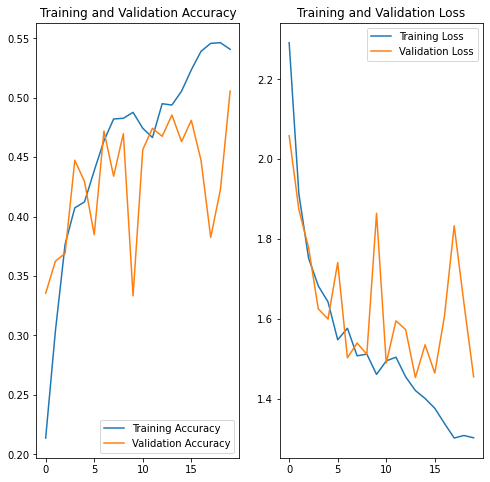

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Overfitting is less of a problem after applying dropout layer and data augmentation.
### Model performance has not improved at all. I'll look at how the classes are distributed in the training set to see if there are any class imbalances.

# -----------------------------------------------------------------------------------------

# Checking class imbalance

In [20]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,melanoma,438
1,pigmented benign keratosis,462
2,nevus,357
3,basal cell carcinoma,376
4,actinic keratosis,114
5,squamous cell carcinoma,181
6,vascular lesion,139
7,seborrheic keratosis,77
8,dermatofibroma,95


# Visualize the Number of image in each class.

<AxesSubplot:xlabel='No. of Image', ylabel='Class'>

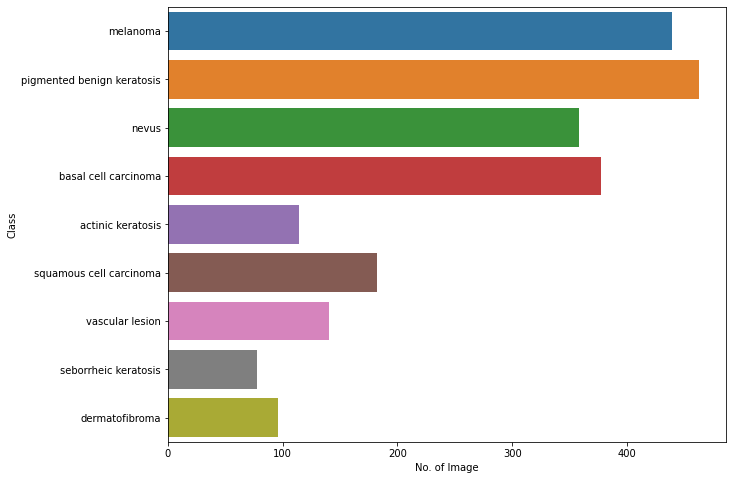

In [41]:
import seaborn as sns
sns.color_palette("Paired")
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

#### Augmentor is a Python package designed to aid the augmentation and artificial generation of image data for machine learning tasks. It is primarily a data augmentation tool, but will also incorporate basic image pre-processing functionality.

In [22]:
!pip install Augmentor

#### By doing this, more samples will be added across all classes, ensuring that no class has a lack of samples.

In [24]:
path_to_training_dataset="/Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    #Adding 500 samples each class.
    p.sample(500) 

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD572288190>:   2%|▏         | 11/500 [00:00<00:36, 13.54 Samples/s]                 

Initialised with 114 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD579332400>: 100%|██████████| 500/500 [00:05<00:00, 93.11 Samples/s] 
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD572296340>:   2%|▏         | 9/500 [00:00<01:21,  6.03 Samples/s]                  

Initialised with 376 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD5798863D0>: 100%|██████████| 500/500 [00:06<00:00, 81.86 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD57935EA30>:   2%|▏         | 11/500 [00:00<00:41, 11.78 Samples/s]                  

Initialised with 95 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD579886C40>: 100%|██████████| 500/500 [00:06<00:00, 82.30 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD604AE41C0>: 100%|██████████| 500/500 [00:36<00:00, 13.81 Samples/s]                   
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7FD60593DBE0>: 100%|██████████| 500/500 [00:34<00:00, 14.39 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD6128F0070>:   0%|          | 2/500 [00:00<01:24,  5.87 Samples/s]

Initialised with 462 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5F66FF550>: 100%|██████████| 500/500 [00:07<00:00, 64.44 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD6058FE730>:   0%|          | 1/500 [00:00<01:00,  8.19 Samples/s]

Initialised with 77 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FD577EA3130>: 100%|██████████| 500/500 [00:15<00:00, 31.62 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD5F7085C40>:   0%|          | 2/500 [00:00<01:25,  5.83 Samples/s]

Initialised with 181 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5F3A423A0>: 100%|██████████| 500/500 [00:07<00:00, 69.53 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD577EA33D0>:   0%|          | 1/500 [00:00<01:18,  6.38 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD606A2D040>: 100%|██████████| 500/500 [00:07<00:00, 65.46 Samples/s]


# Counting total number of image generated by Augmentor.

In [11]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [12]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

dataframe_dict_new = dict(zip(path_list, lesion_list_new))

#dataframe that store path and label of the images generated by Augmentor
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

#label count.
df2['Label'].value_counts()

melanoma                      500
pigmented benign keratosis    500
nevus                         500
basal cell carcinoma          500
actinic keratosis             500
squamous cell carcinoma       500
vascular lesion               500
seborrheic keratosis          500
dermatofibroma                500
Name: Label, dtype: int64

# Training the model on the data created using Augmentor

In [13]:
batch_size = 32
img_height = 180
img_width = 180

In [14]:
data_dir_train="/Users/ayushmehta/Downloads/Upgrad/CNN Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" 

#Training dataset.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,    #20% fraction of data to reserve for validation.
  subset = "training",
  image_size=(img_height, img_width),label_mode='categorical',  #label_mode='categorical' means that the labels are encoded as a categorical vector 
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [15]:
#Validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),label_mode='categorical',   #label_mode='categorical' means that the labels are encoded as a categorical vector
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# Model 3

In [20]:
model3 = Sequential()

model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization 
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

# Compiling the model

In [21]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Training the model

In [22]:
epochs = 30
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/30
169/169 [==============================] - 146s 850ms/step - loss: 2.3785 - accuracy: 0.1964 - val_loss: 2.8876 - val_accuracy: 0.1789
Epoch 2/30
169/169 [==============================] - 166s 981ms/step - loss: 1.8250 - accuracy: 0.3231 - val_loss: 1.9342 - val_accuracy: 0.2457
Epoch 3/30
169/169 [==============================] - 167s 981ms/step - loss: 1.5968 - accuracy: 0.4030 - val_loss: 1.7792 - val_accuracy: 0.3192
Epoch 4/30
169/169 [==============================] - 169s 994ms/step - loss: 1.4698 - accuracy: 0.4368 - val_loss: 1.6265 - val_accuracy: 0.3489
Epoch 5/30
169/169 [==============================] - 167s 982ms/step - loss: 1.4113 - accuracy: 0.4631 - val_loss: 1.6996 - val_accuracy: 0.3675
Epoch 6/30
169/169 [==============================] - 1327s 8s/step - loss: 1.3613 - accuracy: 0.4853 - val_loss: 1.6658 - val_accuracy: 0.3645
Epoch 7/30
169/169 [==============================] - 146s 861ms/step - loss: 1.2950 - accuracy: 0.5050 - val_loss: 1.4144 - v

# Visualizing the result

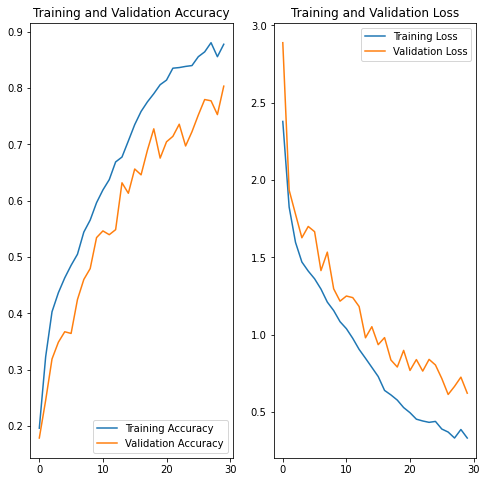

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### The training accuracy and validation accuracy both rise with the final model (model3).
### Problem of model overfitting is resolved.
### Class rebalancing helps in enhancement and the greatest possible training and validation accuracy.

# -----------------------------------------------------------------------------------------

# Let us try if we can get accuracy more then this, without overfitting of model

# Model 4

### Using Augmentor with the data_augmentation technique

In [16]:
model3 = Sequential()
model3.add(data_augmentation) 
model3.add(rescale)   #Rescaling Layer

#First Convulation layer
model3.add(layers.Conv2D(32,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Second Convulation Layer
model3.add(layers.Conv2D(64,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))
model3.add(layers.Dropout(0.25))

#Third Convulation Layer
model3.add(layers.Conv2D(128,kernel_size=(2,2),activation='relu'))
model3.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
model3.add(layers.Flatten())

#Dense Layer
model3.add(layers.Dense(512,activation='relu'))

#Dropout layer
model3.add(layers.Dropout(0.25))

#Batch normalization: is a method used to make artificial neural networks faster and more stable through normalization 
#of the layers' inputs by re-centering and re-scaling.
model3.add(layers.BatchNormalization())

#Dense Layer
model3.add(layers.Dense(128,activation='relu'))

#Dropout layer with 50% Fraction of the input units to drop.
model3.add(layers.Dropout(0.50))

#Batch normalization
model3.add(layers.BatchNormalization())

#Dense layer with Softmax activation function.
model3.add(layers.Dense(len(class_names),activation='softmax'))

# Compling the model

In [17]:
model3.compile(optimizer='Adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

# Training the model

In [18]:
epochs = 30
history = model3.fit(train_ds,epochs=epochs,validation_data=val_ds,verbose=1)

Epoch 1/30


169/169 [==============================] - 184s 1s/step - loss: 2.4213 - accuracy: 0.1858 - val_loss: 2.8644 - val_accuracy: 0.1596
Epoch 2/30
169/169 [==============================] - 1488s 9s/step - loss: 1.8123 - accuracy: 0.3336 - val_loss: 2.7937 - val_accuracy: 0.2390
Epoch 3/30
169/169 [==============================] - 167s 982ms/step - loss: 1.6437 - accuracy: 0.3804 - val_loss: 2.0642 - val_accuracy: 0.2390
Epoch 4/30
169/169 [==============================] - 171s 1s/step - loss: 1.5911 - accuracy: 0.3900 - val_loss: 2.0481 - val_accuracy: 0.2791
Epoch 5/30
169/169 [==============================] - 214s 1s/step - loss: 1.5222 - accuracy: 0.4241 - val_loss: 1.7550 - val_accuracy: 0.3474
Epoch 6/30
169/169 [==============================] - 237s 1s/step - loss: 1.4876 - accuracy: 0.4379 - val_loss: 1.9361 - val_accuracy: 0.2814
Epoch 7/30
169/169 [==============================] - 239s 1s/step - loss: 1.4474 - accuracy: 0.4449 - val_loss: 1.6934 - val_accuracy: 0.3415
Epoch 

# Visualizing the result

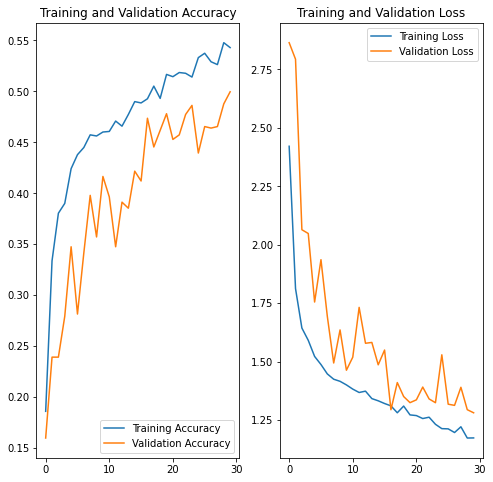

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Haven't got good accuray using Model 4.

## Also tried 2 more models
### 1. Used Model 1 with Augmentor and got good accuracy.
### 2. Used Model 3 with 45 epoch and got accuracy = 90% and validation accuracy = 84%.